# Analysis of `RWC_alam()`

*Arthur Ryman*
*Last Updated: 2022-05-15*

## Introduction

The ACM function `RWC_alam()` minimises the expectation value of the RWC Hamiltonian operator on the ground 
state by varying the parameters $a$ and $\lambda_0$ with $\lambda_0$ a function of $a$.
The function `RWC_alam()` uses the SymPy function `solveset()` to find the zeroes of the derivative of the expectation value.

The `solveset()` function correctly finds the zero for values of the parameter $B$ in the range 
$1 \le B \le 14$.
However, when $B \ge 15$ it incorrectly returns the empty set even though at least one zero always exists.

The goal of this notebook is to create a simplified test case that can be attached to a SymPy bug report.

## Problem Statement

This section uses SymPy to define all the relevant variables and functions.

In [1]:
from sympy import *

### Variables

In [2]:
a: Symbol = Symbol('a', real=True, positive=True)
a

a

In [3]:
A: Symbol = Symbol('A', real=True, positive=True)
A

A

In [4]:
lambda0: Symbol = Symbol('lambda0', real=True, positive=True)
lambda0

lambda0

In [5]:
beta0: Symbol = Symbol('beta0', real=True, nonnegative=True)
beta0

beta0

In [6]:
B: Symbol = Symbol('B', real=True, positive=True)
B

B

In the failing test case $c_1 < 0$ so we only consider this case.

In [7]:
c1: Symbol = Symbol('c1', real=True, negative=True)
c1

c1

In [8]:
c2: Symbol = Symbol('c2', real=True, positive=True)
c2

c2

In [9]:
E: Symbol = Symbol('E', real=True, nonnegative=True)
E

E

### Functions

In [10]:
A_a: Expr = a ** 2
A_a

a**2

In [11]:
beta0_c1_c2: Expr = sqrt(-c1 / (2 * c2))
beta0_c1_c2

sqrt(2)*sqrt(-c1)/(2*sqrt(c2))

In [12]:
lambda0_A: Expr = 1 + sqrt(Rational(9, 4) + (A * beta0 ** 2) ** 2)
lambda0_A

sqrt(A**2*beta0**4 + 9/4) + 1

In [13]:
lambda0_a: Expr = lambda0_A.subs(A, A_a)
lambda0_a

sqrt(a**4*beta0**4 + 9/4) + 1

In [14]:
E1_A_lambda0: Expr = A / (2 * B) * (1 + 9 / (4 * (lambda0 - 1)))
E1_A_lambda0

A*(1 + 9/(4*lambda0 - 4))/(2*B)

In [15]:
E1_a_lambda0: Expr = E1_A_lambda0.subs(A, A_a)
E1_a_lambda0

a**2*(1 + 9/(4*lambda0 - 4))/(2*B)

In [16]:
E2_A_lambda0: Expr =  B / (2 * A) * c1 * lambda0
E2_A_lambda0

B*c1*lambda0/(2*A)

In [17]:
E2_a_lambda0: Expr =  E2_A_lambda0.subs(A, A_a)
E2_a_lambda0

B*c1*lambda0/(2*a**2)

In [18]:
E3_A_lambda_0: Expr = B / (2 * A ** 2) * c2 * lambda0 * (lambda0 + 1)
E3_A_lambda_0

B*c2*lambda0*(lambda0 + 1)/(2*A**2)

In [19]:
E3_a_lambda_0: Expr = E3_A_lambda_0.subs(A, A_a)
E3_a_lambda_0

B*c2*lambda0*(lambda0 + 1)/(2*a**4)

In [20]:
E_A_lambda0: Expr = E1_A_lambda0 + E2_A_lambda0 + E3_A_lambda_0
E_A_lambda0

A*(1 + 9/(4*lambda0 - 4))/(2*B) + B*c1*lambda0/(2*A) + B*c2*lambda0*(lambda0 + 1)/(2*A**2)

In [21]:
E_a_lambda0: Expr = E_A_lambda0.subs(A, A_a)
E_a_lambda0

B*c1*lambda0/(2*a**2) + B*c2*lambda0*(lambda0 + 1)/(2*a**4) + a**2*(1 + 9/(4*lambda0 - 4))/(2*B)

### Variable Bindings

In the situations of interest, variables are bound to constants or functions.
In our case we use:

$$
\begin{align}
    c_1 &= -3 \\
    c_2 &= 2
\end{align}
$$

In [22]:
def make_bindings() -> dict[Symbol, Expr]:
    return {
        B: B,
        c1: S(-3),
        c2: S(2),
        beta0: beta0_c1_c2,
        A: A,
        lambda0: lambda0_A,
        E: E_A_lambda0
    }
bindings = make_bindings()
bindings

{B: B,
 c1: -3,
 c2: 2,
 beta0: sqrt(2)*sqrt(-c1)/(2*sqrt(c2)),
 A: A,
 lambda0: sqrt(A**2*beta0**4 + 9/4) + 1,
 E: A*(1 + 9/(4*lambda0 - 4))/(2*B) + B*c1*lambda0/(2*A) + B*c2*lambda0*(lambda0 + 1)/(2*A**2)}

In [23]:
bindings[beta0] = bindings[beta0].subs(bindings)
bindings[beta0]

sqrt(3)/2

In [24]:
bindings[beta0].evalf()

0.866025403784439

In [25]:
bindings[lambda0] = bindings[lambda0].subs(bindings)
bindings[lambda0]

sqrt(9*A**2/16 + 9/4) + 1

In [26]:
bindings[E] = bindings[E].subs(bindings)
bindings[E]

A*(1 + 9/(4*sqrt(9*A**2/16 + 9/4)))/(2*B) - 3*B*(sqrt(9*A**2/16 + 9/4) + 1)/(2*A) + B*(sqrt(9*A**2/16 + 9/4) + 1)*(sqrt(9*A**2/16 + 9/4) + 2)/A**2

In [27]:
D: Expr = bindings[E].diff(A)
D

-81*A**2/(128*B*(9*A**2/16 + 9/4)**(3/2)) - 27*B/(32*sqrt(9*A**2/16 + 9/4)) + (1 + 9/(4*sqrt(9*A**2/16 + 9/4)))/(2*B) + 9*B*(sqrt(9*A**2/16 + 9/4) + 1)/(16*A*sqrt(9*A**2/16 + 9/4)) + 9*B*(sqrt(9*A**2/16 + 9/4) + 2)/(16*A*sqrt(9*A**2/16 + 9/4)) + 3*B*(sqrt(9*A**2/16 + 9/4) + 1)/(2*A**2) - 2*B*(sqrt(9*A**2/16 + 9/4) + 1)*(sqrt(9*A**2/16 + 9/4) + 2)/A**3

In [28]:
Z: Expr = simplify(2 * B * D)
Z

-3*A**2/(A**2 + 4)**(3/2) - 9*B**2/(4*sqrt(A**2 + 4)) + 1 + 3/sqrt(A**2 + 4) + 9*B**2/(2*A*sqrt(A**2 + 4)) + 9*B**2*sqrt(A**2 + 4)/(4*A**2) + 3*B**2/A**2 - 9*B**2*sqrt(A**2 + 4)/A**3 - 17*B**2/A**3

## Visualize the Derivative

<AxesSubplot:>

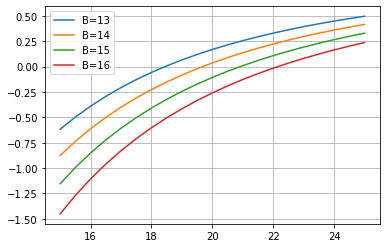

In [29]:
import numpy as np
import pandas as pd

A_index = np.arange(15.0, 25.1, 0.5)
Z_df = pd.DataFrame(index=A_index)
for B_value in range(13, 17):
    Z_df[f'B={B_value}'] = [float(Z.subs([(B, B_value), (A, x)])) for x in A_index]
Z_df.plot(grid=True)

The plot shows that the derivative has a zero for each value of $B$.

Next, run `solveset()' on these expressions.

In [30]:
Z_14 = simplify(Z.subs(B, 14))
Z_14

(A**7 + 596*A**5 - 882*A**4*sqrt(A**2 + 4) - 3332*A**4 + 1776*A**3*sqrt(A**2 + 4) + 4720*A**3 - 10584*A**2*sqrt(A**2 + 4) - 26656*A**2 + 7056*A*sqrt(A**2 + 4) + 9408*A - 28224*sqrt(A**2 + 4) - 53312)/(A**3*(A**4 + 8*A**2 + 16))

In [31]:
solveset(Z_14, A)

KeyboardInterrupt: 